In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline
from typing import List

In [3]:
def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

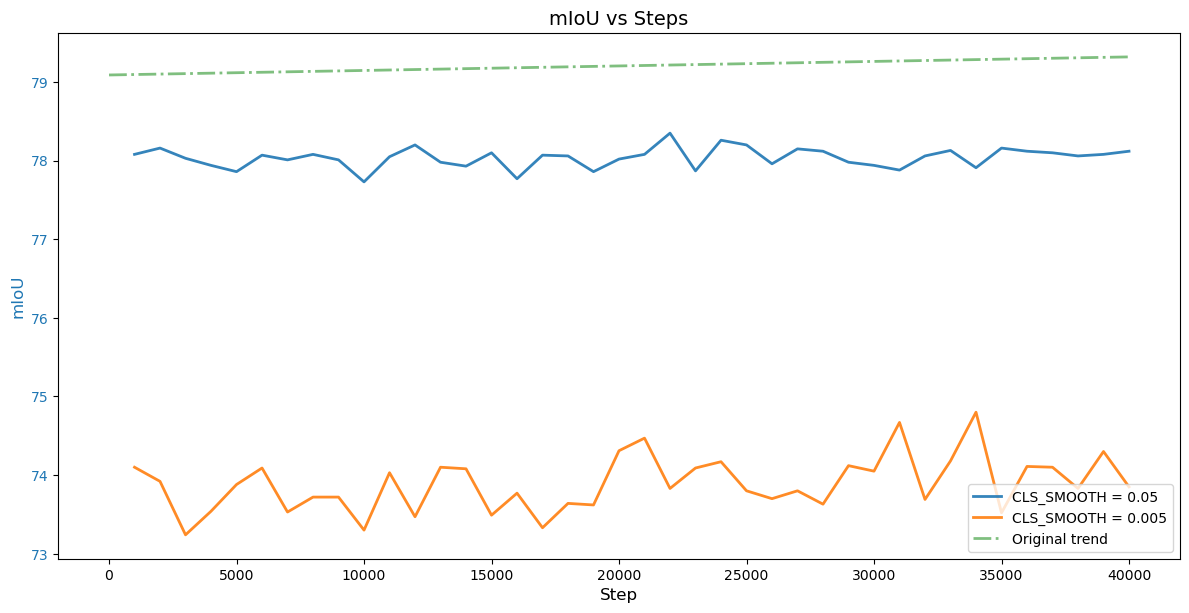

In [6]:

fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Step', fontsize=12)
ax1.set_ylabel('mIoU', color=color, fontsize=12)

csvs = ['20', '21']
labels = ['CLS_SMOOTH = 0.05', 'CLS_SMOOTH = 0.005']

for i, csv in enumerate(csvs):
    
    # Load the data from the CSV file
    df = pd.read_csv(f"../{csv}/metrics.csv")

    original_values = df['mIoU']

    # Plot the original data

    ax1.plot(df['step'], original_values, label=labels[i], alpha=0.9, linewidth=2, linestyle='-')
    ax1.tick_params(axis='y', labelcolor=color)

# Adding the straight line
start_y = 79.09
end_y = 79.32
start_x = 0
end_x = 40000
ax1.plot([start_x, end_x], [start_y, end_y], color='green', alpha=0.5, linestyle='-.', linewidth=2, label='Original trend')

# Title and legend
fig.tight_layout()
plt.title('mIoU vs Steps', fontsize=14)
fig.legend(loc="lower right", bbox_to_anchor=(1,0), bbox_transform=ax1.transAxes)

# Saving and showing the plot
plt.savefig('Figures/Smoothed_mIoU_v1.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
# Load the data from the CSV file
df = pd.read_csv("metrics.csv")

window_size = 2

# Compute the rolling mean
original_values = df['mAcc']

rolling_values = original_values.rolling(window=window_size, center=True).mean()
smoothed_values = smooth(original_values, 0.999)

# Plot the original data
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Step', fontsize=12)
ax1.set_ylabel('Original Value', color=color, fontsize=12)
ax1.plot(df['step'], original_values, color=color, label='mAcc', alpha=1, linewidth=2, linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot the smoothed data on a second y-axis
color = 'tab:red'
#ax2.set_ylabel('Smoothed Value', color=color, fontsize=12)
ax2.plot(df['step'], smoothed_values, color=color, label='trend', alpha=0.5, linewidth=2, linestyle='--')
#ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)
ax2.set_yticks([])

# Title and legend
fig.tight_layout()
plt.title('mAcc vs Steps', fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Saving and showing the plot
plt.savefig('Figures/Smoothed_mIoU_v1.png', dpi=300, bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'metrics.csv'

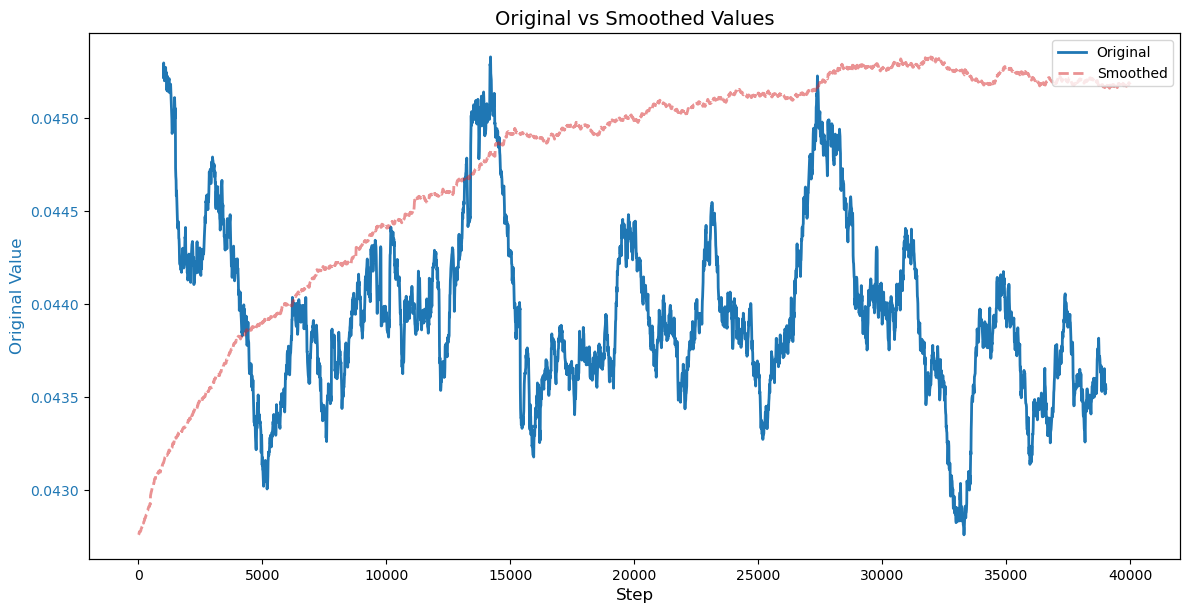

In [ ]:
# Load the data from the CSV file
df = pd.read_csv("losses.csv")

window_size = 200


# Compute the rolling mean
original_values = df['loss']

rolling_values = original_values.rolling(window=window_size, center=True).mean()
smoothed_values = smooth(original_values, 0.999)

# Plot the original data
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Step', fontsize=12)
ax1.set_ylabel('Original Value', color=color, fontsize=12)
ax1.plot(df['step'], rolling_values, color=color, label='Original', alpha=1, linewidth=2, linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Plot the smoothed data on a second y-axis
color = 'tab:red'
#ax2.set_ylabel('Smoothed Value', color=color, fontsize=12)
ax2.plot(df['step'], smoothed_values, color=color, label='Smoothed', alpha=0.5, linewidth=2, linestyle='--')
#ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)
ax2.set_yticks([])

# Title and legend
fig.tight_layout()
plt.title('Original vs Smoothed Values', fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Saving and showing the plot
plt.savefig('Figures/Smoothed_mIoU_v1.png', dpi=300, bbox_inches='tight')
plt.show()